In [1]:
from __future__ import division
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

# Import LogoMaker
import logomaker

%matplotlib inline
plt.ion()

In [2]:
# Read in sortseq data
wtseq = 'AATTAATGTGAGTTAGCTCACTCATTAGGCACCCCAGGCTTTACACTTTATGCTTCCGGCTCGTATGTTGTGTGG'
L = len(wtseq)
poss = range(-L,0)
df_wt = pd.read_csv('data/full-wt-formatted.txt', delim_whitespace=True)
df_0 = pd.read_csv('data/full-0-formatted.txt', delim_whitespace=True)

In [3]:
# Load counts matrix from files
counts_wt_mat = logomaker.load_alignment(sequences=df_wt['seq'], sequence_counts=df_wt['ct_9'])
counts_0_mat = logomaker.load_alignment(sequences=df_0['seq'], sequence_counts=df_0['ct_4'])
bg_mat = logomaker.load_alignment(sequences=df_wt['seq'], sequence_counts=df_wt['ct_0'])

In [4]:
parameters_text = """
colors : 'tomato'
logo_type : 'enrichment'
highlight_sequence : 'AATTAATGTGAGTTAGCTCACTCATTAGGCACCCCAGGCTTTACACTTTATGCTTCCGGCTCGTATGTTGTGTGG'
xtick_spacing : 10
axes_type : 'everything'
highlight_colors : 'white'
shift_first_position_to : -75
width : .9
font_family : 'Arial Rounded MT Bold'
font_weight : 'heavy'
below_flip : False
stack_order : 'big_on_top'
title : 'A title the user can edit'
ytick_format : '%0.0f'
max_positions_per_line : 50
style_sheet: 'dark_background'
"""
style_file = 'parameters_file.txt'
with open(style_file,'w') as f:
    f.write(parameters_text)

[set] colors = 'tomato'
[set] logo_type = 'enrichment'
[set] highlight_sequence = 'AATTAATGTGAGTTAGCTCACTCATTAGGCACCCCAGGCTTTACACTTTATGCTTCCGGCTCGTATGTTGTGTGG'
[set] xtick_spacing = 10
[set] axes_type = 'everything'
[set] highlight_colors = 'white'
[set] shift_first_position_to = -75
[set] width = .9
[set] font_family = 'Arial Rounded MT Bold'
[set] font_weight = 'heavy'
[set] below_flip = False
[set] stack_order = 'big_on_top'
[set] title = 'A title the user can edit'
[set] ytick_format = '%0.0f'
[set] max_positions_per_line = 50
[set] style_sheet = 'dark_background'
Using style sheet dark_background.


[<Logo.Logo instance at 0x11117b6c8>, <Logo.Logo instance at 0x10f4dc830>]

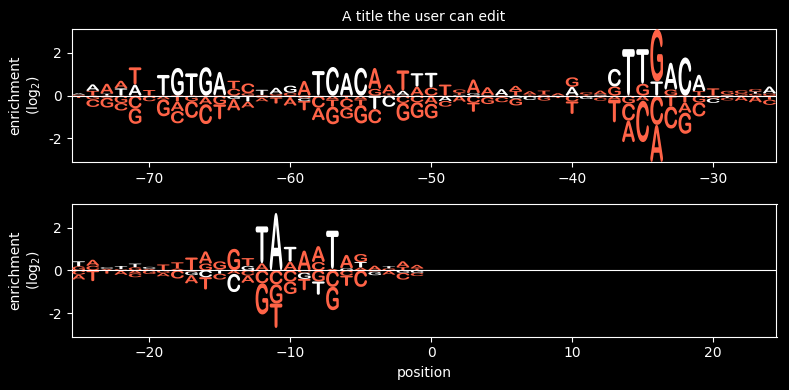

In [5]:
# Make logos
logomaker.make_styled_logo(style_file=style_file,
                           matrix=counts_wt_mat, 
                           background=bg_mat)

In [6]:
import numpy as np

In [7]:
ylim = [-2, 1]
np.max(np.abs([y for y in ylim]))

2